In [17]:
%pylab inline --no-import-all
from sympy import Symbol, symbols, solve, lambdify
#import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
#import matplotlib.pyplot as plt

In [3]:
#observables
(n11, n12, n21, n22) =  symbols('n11 n12 n21 n22')
#parameters
(s1, s2, b1, b2, mu) =  symbols('s1 s2 b1 b2 mu')
#helpers
(n1, n2, nu11, nu12, n21, nu22) =  symbols('n1 n2 nu11 nu12 nu21 n22')
#estimators
(s1hat, s2hat, muhat) = symbols('s1hat s2hat muhat')

In [4]:
#first run
nu11 = s1hat + b1
nu12 = s2hat + b2
#second run
nu21 = muhat*s1hat+b1
nu22 = muhat*s2hat+b2

In [5]:
#first run
shatSubs = [(key, val) for key,val in solve([n11-nu11, n12-nu12], s1hat, s2hat).iteritems()]
moreSubs = shatSubs+[(n11,10),(n12,10),(n21,10),(n22,10),(b1,5),(b2,5)]
s1hat.subs(moreSubs), s2hat.subs(moreSubs)

(5, 5)

In [6]:
#second run
[expr1, expr2] = solve( s1hat+s2hat - n21*s1hat/nu21 - n22*s2hat/nu22, muhat)

In [7]:
expr1.subs(moreSubs),expr2.subs(moreSubs)

(-1, 1)

In [8]:
muhatFunc = lambdify((n11,n12,n21,n22,b1,b2), expr2.subs(shatSubs), "numpy")
muhatFunc(10,10,10,10,5,5)

1.0

In [210]:
def inclusive_muhatFunc(n11,n12,n21,n22,b1,b2):
    shat = 1.*(n11+n12-b1-b2)+.01
    return np.maximum(-7,np.minimum(7,np.divide(n21+n22-b1-b2,shat)))

## Generate toy experiments without Run-1 filtering

In [720]:
#b experiments, no filtering
nExp = 10000
btruth=[(b1,100),(b2,100)]
struth=[(s1hat,0),(s2hat,0),(muhat,0)]
truth=btruth+struth
n11.subs(truth),nu12.subs(truth),nu21.subs(truth),nu22.subs(truth)
n11_expts = np.random.poisson(nu11.subs(truth),nExp)
n12_expts = np.random.poisson(nu12.subs(truth),nExp)
n21_expts = np.random.poisson(nu21.subs(truth),nExp)
n22_expts = np.random.poisson(nu22.subs(truth),nExp)
muhat_b_expts = muhatFunc(n11_expts,n12_expts,n21_expts,n22_expts,float(b1.subs(truth)),float(b2.subs(truth)))
muhat_b_expts = filter(lambda x: x<1e6, muhat_b_expts)
muhat_b_expts =  np.maximum(-7,np.minimum(7,muhat_b_expts))
inclusive_muhat_b_expts = inclusive_muhatFunc(n11_expts,n12_expts,n21_expts,n22_expts,float(b1.subs(truth)),float(b2.subs(truth)))

In [721]:
#s experiments, no filtering
btruth=[(b1,100),(b2,100)]
struth=[(s1hat,10*2./2.),(s2hat,10*0./2.),(muhat,1)]
truth=btruth+struth
n11.subs(truth),nu12.subs(truth),nu21.subs(truth),nu22.subs(truth)
n11_expts = np.random.poisson(nu11.subs(truth),nExp)
n12_expts = np.random.poisson(nu12.subs(truth),nExp)
n21_expts = np.random.poisson(nu21.subs(truth),nExp)
n22_expts = np.random.poisson(nu22.subs(truth),nExp)
muhat_s_expts = muhatFunc(n11_expts,n12_expts,n21_expts,n22_expts,float(b1.subs(truth)),float(b2.subs(truth)))
muhat_s_expts = filter(lambda x: x<1e6, muhat_s_expts)
muhat_s_expts =  np.maximum(-7,np.minimum(7,muhat_s_expts))
inclusive_muhat_s_expts = inclusive_muhatFunc(n11_expts,n12_expts,n21_expts,n22_expts,float(b1.subs(truth)),float(b2.subs(truth)))

## Generate toy experiments *with*  Run-1 filtering

In [849]:
#b experiments, with filtering
nExp = 300000
btruth=[(b1,100),(b2,100)]
struth=[(s1hat,0),(s2hat,0),(muhat,0)]
truth=btruth+struth
n11_expts = np.random.poisson(nu11.subs(truth),nExp)
n12_expts = np.random.poisson(nu12.subs(truth),nExp)
n21_expts = np.random.poisson(nu21.subs(truth),nExp)
n22_expts = np.random.poisson(nu22.subs(truth),nExp)
temp = np.zeros(nExp*4).reshape(nExp,4)
temp[:,0] = n11_expts
temp[:,1] = n12_expts
temp[:,2] = n21_expts
temp[:,3] = n22_expts
temp = np.array(filter(lambda x: x[0]>b1.subs(truth)*1.1 and x[1]>b2.subs(truth)*1.1, temp))
n11_expts = temp[:,0]
n12_expts = temp[:,1]
n21_expts = temp[:,2]
n22_expts = temp[:,3]
len(n22_expts)
muhat_b_expts = muhatFunc(n11_expts,n12_expts,n21_expts,n22_expts,float(b1.subs(truth)),float(b2.subs(truth)))
muhat_b_expts = filter(lambda x: x<1e6, muhat_b_expts)
muhat_b_expts =  np.maximum(-10,np.minimum(10,muhat_b_expts))
inclusive_muhat_b_expts = inclusive_muhatFunc(n11_expts,n12_expts,n21_expts,n22_expts,float(b1.subs(truth)),float(b2.subs(truth)))
nu11.subs(truth),nu12.subs(truth),nu21.subs(truth),nu22.subs(truth)

(100, 100, 100, 100)

In [850]:
#s experiments, with filtering
nExp = 10000
struth=[(s1hat,50),(s2hat,0),(muhat,1)]
truth=btruth+struth
n11_expts = np.random.poisson(nu11.subs(truth),nExp)
n12_expts = np.random.poisson(nu12.subs(truth),nExp)
n21_expts = np.random.poisson(nu21.subs(truth),nExp)
n22_expts = np.random.poisson(nu22.subs(truth),nExp)
temp = np.zeros(nExp*4).reshape(nExp,4)
temp[:,0] = n11_expts
temp[:,1] = n12_expts
temp[:,2] = n21_expts
temp[:,3] = n22_expts
temp = np.array(filter(lambda x: x[0]>b1.subs(truth)*1.1 and x[1]>b2.subs(truth)*1.1, temp))
n11_expts = temp[:,0]
n12_expts = temp[:,1]
n21_expts = temp[:,2]
n22_expts = temp[:,3]
len(muhat_s_expts)
muhat_s_expts = muhatFunc(n11_expts,n12_expts,n21_expts,n22_expts,float(b1.subs(truth)),float(b2.subs(truth)))
muhat_s_expts = filter(lambda x: x<1e6, muhat_s_expts)
muhat_s_expts =  np.maximum(-10,np.minimum(10,muhat_s_expts))
inclusive_muhat_s_expts = inclusive_muhatFunc(n11_expts,n12_expts,n21_expts,n22_expts,float(b1.subs(truth)),float(b2.subs(truth)))
nu11.subs(truth),nu12.subs(truth),nu21.subs(truth),nu22.subs(truth)

(150, 100, 150, 100)

shat | s = 0.923 +/- 0.101
shat | b = -0.001 +/- 0.214


(1582, 6359)

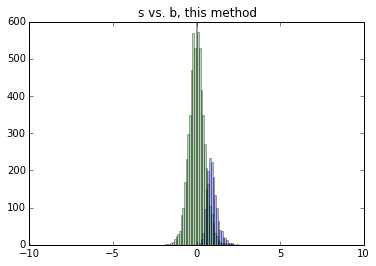

In [851]:
#s vs. b for this method
edges = np.linspace(-10,10,200)
#non uniform binning
#edges=np.append(np.arange(-10,-3,1),np.arange(-3,5,.1))
#np.append(edges,np.arange(5,10,1))
#print len(edges)
s_contents, edges, patches = plt.hist(muhat_s_expts,bins=edges,alpha=0.3,color='b')
b_contents, edges, patches = plt.hist(muhat_b_expts,bins=edges,alpha=0.3,color='g')
plt.title('s vs. b, this method')
print "shat | s = %.3f +/- %.3f" %(np.mean(muhat_s_expts), np.var(muhat_s_expts))
print "shat | b = %.3f +/- %.3f" %(np.mean(muhat_b_expts), np.var(muhat_b_expts))
np.min(muhat_b_expts),np.max(muhat_b_expts)
len(muhat_s_expts), len(muhat_b_expts)

shat | s = 0.797 +/- 0.100
shat | b = -0.002 +/- 0.219


array([-1.87421908, -1.68105407, -1.67932827, -1.63934426, -1.60799652,
       -1.58267389, -1.55937625, -1.51795631, -1.4994233 , -1.46097655])

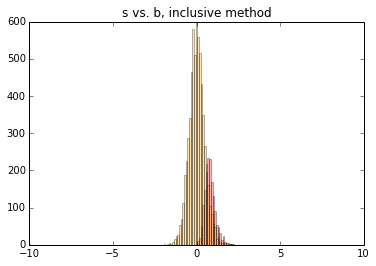

In [852]:
#s vs. b for inclusive method
i_s_contents, edges, patches = plt.hist(inclusive_muhat_s_expts,bins=edges,alpha=0.3,color='r')
i_b_contents, edges, patches = plt.hist(inclusive_muhat_b_expts,bins=edges,alpha=0.3,color='orange')
plt.title('s vs. b, inclusive method')
print "shat | s = %.3f +/- %.3f" %(np.mean(inclusive_muhat_s_expts), np.var(inclusive_muhat_s_expts))
print "shat | b = %.3f +/- %.3f" %(np.mean(inclusive_muhat_b_expts), np.var(inclusive_muhat_b_expts))
np.min(inclusive_muhat_b_expts),np.max(inclusive_muhat_b_expts)
np.sort(inclusive_muhat_b_expts)[:10] #there are lots of very negative entries
#np.sort(inclusive_muhat_b_expts)[-10:] #there are lots of very negative entries

In [853]:
#matplotlib.rcParams['figure.figsize'] = [800,800]

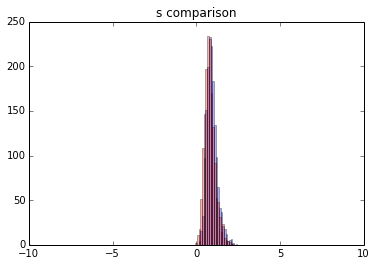

In [854]:
#compare s distributions
contents, edges, patches = plt.hist(muhat_s_expts,bins=edges,alpha=0.3,color='b')
contents, edges, patches = plt.hist(inclusive_muhat_s_expts,bins=edges,alpha=0.3,color='r')
plt.title('s comparison')

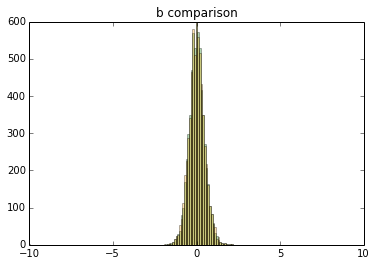

In [855]:
#compare b distributions
contents, edges, patches = plt.hist(muhat_b_expts,bins=edges,alpha=0.3,color='g')
contents, edges, patches = plt.hist(inclusive_muhat_b_expts,bins=edges,alpha=0.3,color='orange')
plt.title('b comparison')

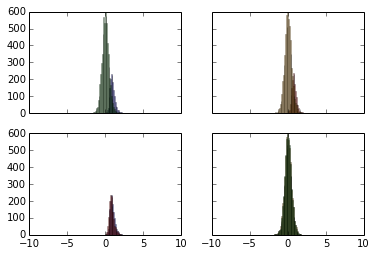

In [856]:
#figsize(600,600)
fig, ax = plt.subplots(2,2,sharex=True, sharey=True)
#plt.figure(None,figsize=(1800,1800))

contents, edges, patches = ax[0][0].hist(muhat_s_expts,bins=edges,alpha=0.3,color='b')
contents, edges, patches = ax[0][0].hist(muhat_b_expts,bins=edges,alpha=0.3,color='g')

contents, edges, patches = ax[0][1].hist(inclusive_muhat_s_expts,bins=edges,alpha=0.3,color='r')
contents, edges, patches = ax[0][1].hist(inclusive_muhat_b_expts,bins=edges,alpha=0.3,color='orange')

contents, edges, patches = ax[1][0].hist(muhat_s_expts,bins=edges,alpha=0.3,color='b')
contents, edges, patches = ax[1][0].hist(inclusive_muhat_s_expts,bins=edges,alpha=0.3,color='r')

contents, edges, patches = ax[1][1].hist(inclusive_muhat_b_expts,bins=edges,alpha=0.3,color='orange')
contents, edges, patches = ax[1][1].hist(muhat_b_expts,bins=edges,alpha=0.3,color='g')

(0, 1.05)

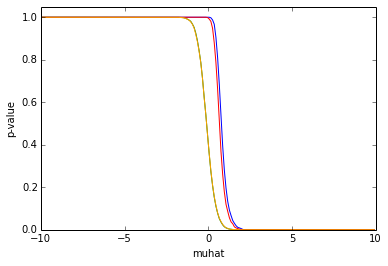

In [857]:
plt.plot(edges[:-1],1.-np.cumsum(s_contents)/np.sum(s_contents),c='b')
plt.plot(edges[:-1],1.-np.cumsum(b_contents)/np.sum(b_contents),c='g')
plt.plot(edges[:-1],1.-np.cumsum(i_s_contents)/np.sum(i_s_contents),c='r')
plt.plot(edges[:-1],1.-np.cumsum(i_b_contents)/np.sum(i_b_contents),c='orange')
plt.xlabel('muhat')
plt.ylabel('p-value')
plt.ylim(0,1.05)

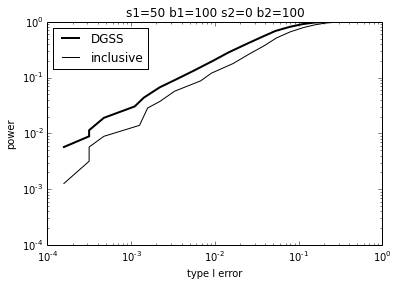

In [ ]:
plt.plot(1.-np.cumsum(b_contents)/np.sum(b_contents),1.-np.cumsum(s_contents)/np.sum(s_contents),c='black',lw=2)
plt.plot(1.-np.cumsum(i_b_contents)/np.sum(i_b_contents),1.-np.cumsum(i_s_contents)/np.sum(i_s_contents),c='black',lw=1)
plt.xlabel('type I error')
plt.ylabel('power')
plt.title('s1=%d b1=%d s2=%d b2=%d' %(s1hat.subs(struth),b1.subs(btruth), s2hat.subs(struth),b2.subs(btruth),))
plt.legend(('DGSS', 'inclusive'),loc='upper left' )
plt.loglog()
plt.savefig("power_s1_%d_b1_%d_s2_%d_b2_%d.pdf" %(s1hat.subs(struth),b1.subs(btruth), s2hat.subs(struth),b2.subs(btruth),))

Notes to self:

current filtering is s1hat >0 and s2hat > 0. Instead we might want cumulative n1+n2-b1-b2>0, but then need to make this method ignore bin if sihat<0.

Might want to cut harder than 0

muhat not best test statistic. If shat small and n2-b2 also small, can get muhat large. Should move to lambda(0).


In [834]:
plt.legend?